# Intro to Matplotlib


####  Review and Outline

Great Work! We have made it this far...we have learned a few important packages in python, e.g., `pandas` and `numpy`, and how to use them to do numeric computings and data manipulation.   

Where are we going to know...we will get into the shining part for every data report: **data visualization**, as the saying goes, "a picture is worth a thousand words". Can you imagine an presentation or report regarding data analysis without graphs? Probably not often.

We start with basic concepts and techinical components in graphs. Then we will talk about different types of graphs to choose from.

In the end, we will focus on the question **How does GDP and it's expenditure componenets co-move?** I'll set it up like a mini-project for data visualization and gradually using advanced graphs options to make the graph look better. 


[This notebook largely follows the discussion in the Book.](https://nyudatabootcamp.gitbook.io/thebook/graphs1)

#### Python

In this notebook, we will learn how to (i) generate the `fig` and `ax` of a figure and then (ii) use the methods associated with those objects to manipulate the properties of the figure to make it informative and nice looking. 

**Buzzwords.** Data visualization, time series, cross sectional data


In [3]:
# Loading the packages

import pandas as pd                 # Our pandas package

# In order to use the pandas_datareader, we have the following lines of code, hard to explain.
# New version for pandas. In the past, we used pandasdatareader, but might be not working anymore
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data  # This is will give us access to FRED
import datetime as dt               # This will get us the datatime package
import matplotlib.pyplot as plt     # The new package we are learning about Matplotlib
                                    # pyplot is just one module of many in this library

%matplotlib inline 
# This line tells jupyter to plot the graphs within the notebook

---
## Plotting Concepts

### Data visualisation

Plot or data visualisation is an abstraction/aggregation to represent data, which can be used to communicate information, sense making and thus extract the values of data.  

So why do we call it as an **abstraction**? For almost every graph, there is a loss of information (hopefully often not so important ones in the current settings), because it is impossible for human beings to absorb all the numbers, texts at once. We often use different physical attributes of vision (length, position, size, shape, and color, etc) to make the transformation of data. 

Thus sometimes, the instentions of visualisation designers may directly have impacts on what we perceive/understand about the data. Also, sometimes even a design decision can motivate the omission of important data. So we will keep this in mind either from the perspective of a reader or designer. Please see the following intuitive example.   


In [4]:
# plot the data from *Fama-French returns*.
ff = data.DataReader('F-F_Research_Data_factors', 'famafrench')[1]
ff.columns = ['xsm', 'smb', 'hml', 'rf']
ff['rm'] = ff['xsm'] + ff['rf']
ff = ff[['rm', 'rf']]               # extract rm (market) and rf (riskfree)
ff.head(5)


,rm,rf
Date,,
2010,17.49,0.12
2011,0.48,0.04
2012,16.34,0.06
2013,35.22,0.02
2014,11.72,0.02


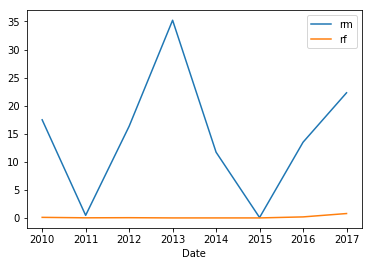

In [5]:
ff.plot()

This is an example of bad practice for data visualization. Why? It uses line graphs to plot two different scales of data on a *single* axis. Moreover, it might confuse/disguise you that the **rf** is essentially the same or flat during the time period. However, it is not, it is **six times larger** in fact!



### Time series vs Cross sectional

A **time series** is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. The data typically has 3 things in common:

* Arrival is almost always recorded as a new entry
* The data typically arrives in time order
* Time is a primary axis (time-intervals can be either regular or irregular)

As we'll see later, time series are very frequently plotted via line charts. A typical example of time series data is as follow. 

In [6]:
gdp  = [13271.1, 13773.5, 14234.2, 14613.8, 14873.7, 14830.4, 14418.7,
        14783.8, 15020.6, 15369.2, 15710.3]
pce  = [8867.6, 9208.2, 9531.8, 9821.7, 10041.6, 10007.2, 9847.0, 10036.3,
        10263.5, 10449.7, 10699.7]
year = list(range(2003,2014))        # use range for years 2003-2013

# Note that we set the index
us = pd.DataFrame({'gdp': gdp, 'pce': pce}, index=year)
print(us)

          gdp      pce
2003  13271.1   8867.6
2004  13773.5   9208.2
2005  14234.2   9531.8
2006  14613.8   9821.7
2007  14873.7  10041.6
2008  14830.4  10007.2
2009  14418.7   9847.0
2010  14783.8  10036.3
2011  15020.6  10263.5
2012  15369.2  10449.7
2013  15710.3  10699.7


While **cross sectional** data is observations that come from different individuals or groups at a single point in time. There it differs from time series data, which the objects are observations varying in time but from a single individuals or groups.

A typical example of cross sectional data is as follow. We will usually use bars graphs to show the relationships among different groups.

In [7]:
code    = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
country = ['United States', 'France', 'Japan', 'China', 'India',
             'Brazil', 'Mexico']
gdppc   = [53.1, 36.9, 36.3, 11.9, 5.4, 15.0, 16.5]

wbdf = pd.DataFrame({'gdppc': gdppc, 'country': country}, index=code)

print(wbdf)

     gdppc        country
USA   53.1  United States
FRA   36.9         France
JPN   36.3          Japan
CHN   11.9          China
IND    5.4          India
BRA   15.0         Brazil
MEX   16.5         Mexico


### Univariate and Multivariate analysis 

**Univariate analysis** is the simplest form of data analysis where the data being analyzed contains only one variable. Since it's a single variable, it doesn’t deal with causes or relationships. We can usually get some insights regarding the statistic features of the data, such as empirical distributions, mean, and skewness, etc. The major purpose univariate bivariate analysis is to explain.

In practice, we usually perform univariate analysis as a stepping stone for futher analysis.


**Multivariate analysis** deals with more than one variables. It deals with causes or relationships. The main purpose multivariate bivariate analysis is to explore the relationships among data.

There are many ways to play with mltivariates depending on your goals, e.g., such as cluster analysis, principal component analysis (PCA), analysis of variance (ANOVA), etc.

---
## Matplotlib 

Python's leading graphics package is **Matplotlib**, which is designed for creating publication-quality plots.

Matplotlib can be used in a number of different ways:

* Approach #1:  Apply plot methods to dataframes.
* Approach #2:  Create figure objects and apply methods to them.

They call on similar functionality, but use different syntax to get it.



####  Approach #1:  Apply plot methods to dataframes


The simplest way to produce graphics from a dataframe is to apply a plot method to it.  Simple is good, we do this a lot.

If we compare this to Excel, we will see that a number of things are preset for us:

* Data.  By default (meaning, if we don't do anything to change it) the data consists of the whole dataframe.
* Chart type.  We'll see below that we have options for lines, bars, or other things.
* `x` and `y` variables.  By default, the `x` variable is the dataframe's index and the `y` variables are the columns of the dataframe -- all of them that can be plotted (e.g. columns with a numeric dtype).

We can change all of these things, just as we can in Excel, but that's the starting point.

**Example (line plot).**  Enter the statement `us.plot()` into a code cell and run it.  This plots every column of the dataframe `us` as a line against the index, the year of the observation.  The lines have different colors.  We didn't ask for this, it's built in.  A legend associates each variable name with a line color.  This is also built in.


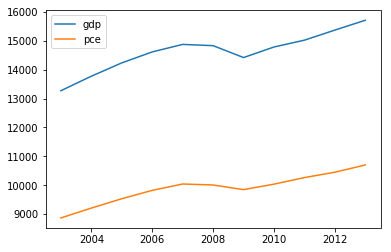

In [8]:
us.plot()

**Example (single line plot).**  We just plotted all the variables -- all two of them -- in the dataframe `us`.  To plot one line, we apply the same method to a single variable -- a series.  The statement `us['gdp'].plot()` plots GDP alone.  The first part -- `us['gdp']` -- is the single variable GDP.  The second part -- `.plot()` -- plots it.


**Example (single line plot 2)**. In addition to getting a series from our dataframe and then plotting the series, we could also set the `y` argument when we call the plot method. The statement `us.plot(y="gdp")` will produce the same plot as `us['gdp'].plot()`.


---
### Time to practice










**Exercise.**  Use the World Bank dataframe `wbdf` to create a bar chart of GDP per capita, the variable `'gdppc'`. *Bonus points:* Create a horizontal bar chart. Which do you prefer?


#### Approach #2:  Create figure objects and apply methods


This approach was mysterious to us at first, but it's now our favorite. The idea is to generate an object -- two objects, in fact -- and apply methods to them to produce the various elements of a graph: the data, their axes, their labels, and so on.



We do this -- as usual -- one step at a time.

**Create objects.** The **`fig`** represent the canvas object while **`ax`** is as the object for charging the details, e.g., type of graphs, colors and axis, etc, in each graph on the canvas.


We'll see this ONE line over and over:


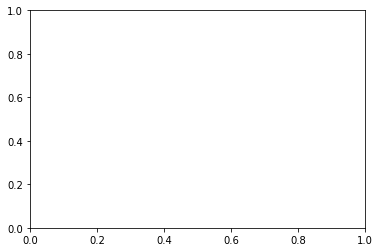

In [9]:
fig, ax = plt.subplots()         # create fig and ax objects

Note that we're using the pyplot function `subplots()`, which creates the objects `fig` and `ax` on the left.   The `subplot()` function produces a blank figure, which is displayed in the Jupyter notebook.  The names `fig` and `ax` can be anything, but these choices are standard.

We say `fig` is a **figure object** and `ax` is an **axis object**.  (Try `type(fig)` and `type(ax)` to see why.)  Once more, the words don't mean what we might think they mean:

* `fig` is a blank canvas for creating a figure.
* `ax` is everything in it:  axes, labels, lines or bars, legend, and so on.

Once we have the objects, we apply methods to them to create graphs.

**Create graphs.**  We create graphs by applying plot-like methods to `ax`.  We typically do this with dataframe plot methods:


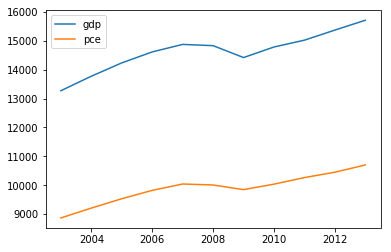

In [10]:
fig, axe = plt.subplots()        # create axis object axe
us.plot(ax=axe)                  # ax= looks for axis object, axe is it

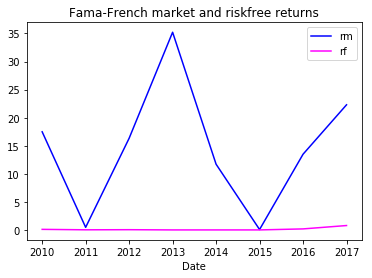

In [11]:
fig, ax = plt.subplots()
ff.plot(ax=ax,
        kind='line',                 # line plot
        color=['blue', 'magenta'],   # line color
        title='Fama-French market and riskfree returns')

---
### Time to practice

**Exercise.**  Let's see if we can teach ourselves the rest:

* Add the argument `kind='bar'` to convert this into a bar chart.
* Add the argument `alpha=0.65` to the bar chart.  What does it do?
* What would you change in the bar chart to make it look better?  Use the help facility to find options that might help.  Which ones appeal to you?



**Exercise (somewhat challenging).** Use the same approach to reproduce our earlier histograms of the Fama-French series.


### Time to review

Take a deep breath.  We've covered a lot of ground, it's time to recapitulate.

We looked at three ways to use Matplotlib:

* Approach #1:  Apply plot methods to dataframes.
* Approach #2:  Create `fig, ax` objects and apply plot methods to them.

This is what their syntax looks like applied to US GDP:

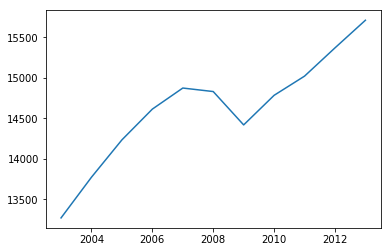

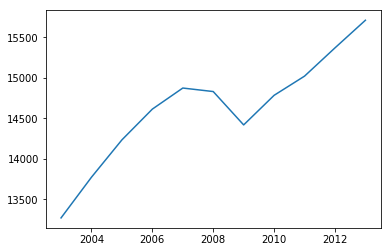

In [12]:
us['gdp'].plot()                   # Approach #1

fig, ax = plt.subplots()           # Approach #2
us['gdp'].plot(ax=ax)

Each one produces the same graph.

Which one should we use?  **Use Approach #2.**  Really.  This is a case where choice is confusing.

We also suggest you not commit any of this to memory.  If you use end up using it a lot, you'll remember it.  If you don't, it's not worth remembering.  We typically start with examples anyway rather than creating new graphs from scratch.



---
## Bells & Whistles

We now know how to create graphs, but if we're honest with ourselves we'd admit they're a little basic. Fortunately, we just got started. We have a huge number of methods available for changing our plots in any way we wish for the purpose of production-grade plots: Choose the most suitable type of for data, Add titles and axis labels （and legend） - **the indispensable components of a chart**, change axis limits, and many other things that haven't crossed our minds yet. 



Here's a short introduction in terms of types of charts and options within this package.


### Graph Types

It is always a difficult problem to choose the suitable when visualizing data. But it is even worse that we do not know how many different types of the charts the `matplotlib` can do. So now let's explore this a little bit and build our knowledge piece by piece.

In addition, we still do not know how to add the titles, axis lables and other features to the graph now. It is okay because we will learn that in a minute!

#### Line Charts

For the line charts, it is almost a review of the eariler session, the most fundamental ones. 

It is most suitable for analyzing the time trends in our dataset but is usually not a great tool for cross sectional data.

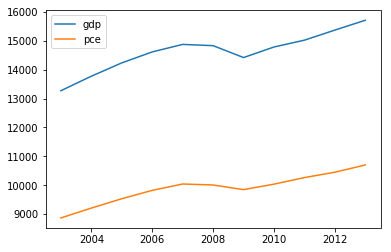

In [13]:
fig, axe = plt.subplots()        # create axis object axe
us.plot(ax=axe)                  # ax= looks for axis object, axe is it

#### Bar Charts

Again, we usually see this a lot. 

It is most suitable for comparing feature values of each observation in our cross sectional data. It is usually not a great tool for time series analysis.

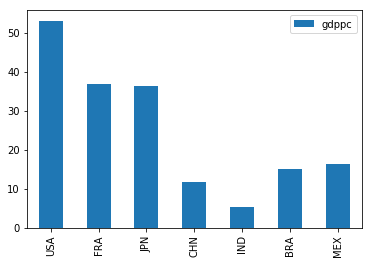

In [14]:
fig, axe = plt.subplots()        # create axis object axe
wbdf.plot.bar(ax=axe)           # ax= looks for axis object, axe is it

We can also easily convert the bars horizontally, namely via `barh` function, where `h` stands for *horizontal*, pretty intuitive, right?

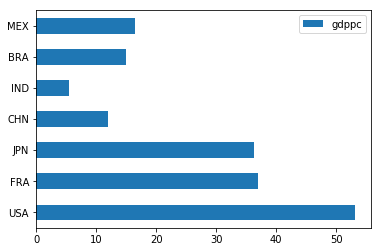

In [15]:
fig, axe = plt.subplots()        # create axis object axe
wbdf.plot.barh(ax=axe)           # ax= looks for axis object, axe is it

Next we are going to learn graphs for describing the **distributions** of the variates.


#### Histgrams 


Sometimes, we want to know the empirical distributions of a univariate. For example, when analyzing the income inequality of a country, we'll usually start with plotting the distributions of income. So that we can sense how far the left/right tail is and where is the mean/median. This is where the **histgrams** kick in.

This graph seems mysteries at first since it requires a little bit calculations but with a short introduction, you will find it easy to understand and master. 


There always two steps for constructing the histgrams (you don't have to do this when using the package):

* Deciding how many bins you want to have. This will be our x-axis after some computations.

* Then in each bin,  we can compute how many data points are within a range. This is our value - frequency in y-axis.

So now we know that the most important parameters for a bin graph is **bins** in `matplotlib` hist function, it controls how many bins we want to have and thus the frequency of observations in each bin.

In the end, we have the following example to further illustrate the idea.



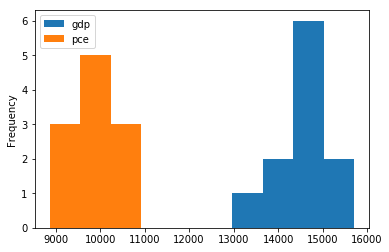

In [16]:
fig, axe = plt.subplots()        # create axis object axe
us.plot.hist(ax=axe)           # ax= looks for axis object, axe is it

We could see from the histograms that the two variates have relatively different distributions with pce centered around **10000** while gdp at **14500**. Besides, the gdp variate have a little bit right skewness. 

As we all know, the bins are decided by the ranges of the data. Let's try how will it change when we motify the number of bins. This number **matters**!

Normally we use the default as a starting point!

Too small number of bins...

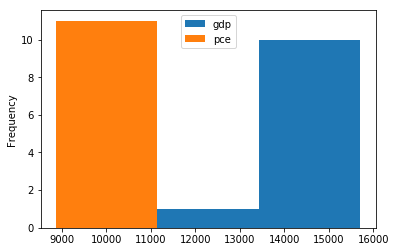

In [17]:
fig, axe = plt.subplots()        # create axis object axe
us.plot.hist(ax=axe,bins=3)           # ax= looks for axis object, axe is it

Too many bins ...

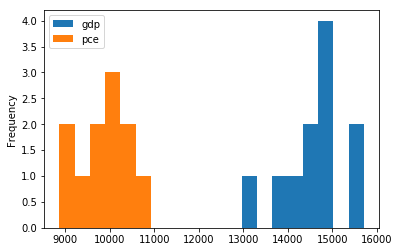

In [18]:
fig, axe = plt.subplots()        # create axis object axe
us.plot.hist(ax=axe,bins=20)           # ax= looks for axis object, axe is it

#### Scatter
It is a way of show the multivariates' relationships or distributions in the data. 

In the following example, we almost see a linear relationship between the two variates. 

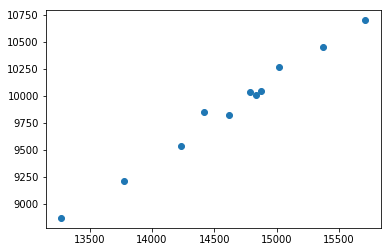

In [19]:
fig, axe = plt.subplots()        # create axis object axe
axe.scatter(x=us['gdp'],y=us['pce']) 


#### Advanced Scatter Charts

Now seeing the relationship, we are eager to see if we can do a curve fiting on it? Yes... But we have to do it manually. Here we use the `polyfit` function from `numpy` package.


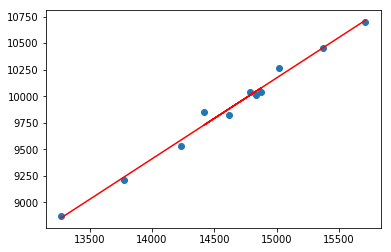

In [20]:
# first we import a polyfit function from numpy
from numpy.polynomial.polynomial import polyfit
x=us['gdp']
y=us['pce']

# we poly fit the data
b, m = polyfit(x, y, 1)

# Plot both the fitting results and the original data
fig, axe = plt.subplots()        # create axis object axe
axe.scatter(x,y) 
axe.plot(x, b+ m*x,'r')

#### Pie

This type of chart can often be used to show the composition of something. Here we will again use the `wbdf` dataset and present a composition of the world GDP. In addition, we can compare each country's contributions more directly and intuitively.



([<matplotlib.patches.Wedge at 0x10e601e80>,
 [Text(0.637429,0.896484,'United States'),
  Text(-0.923629,0.597419,'France'),
  Text(-0.81291,-0.741065,'Japan'),
  Text(0.0365048,-1.09939,'China'),
  Text(0.37055,-1.03571,'India'),
  Text(0.716679,-0.834489,'Brazil'),
  Text(1.05215,-0.320906,'Mexico')])

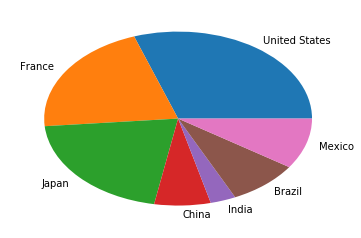

In [21]:
fig, axe = plt.subplots()        # create axis object axe
axe.pie(x=wbdf['gdppc'],labels=wbdf['country'])           # ax= looks for axis object, axe is it

#### Area Charts

An area chart is basically a line chart, but the space between the x-axis and the line is filled with a color or pattern. It is useful for showing part-to-whole relations. It helps you analyze both overall and individual trend information.

**Note** better example needed. Tinghao Will fix this. This data cannot show the usefulness of the area graph.

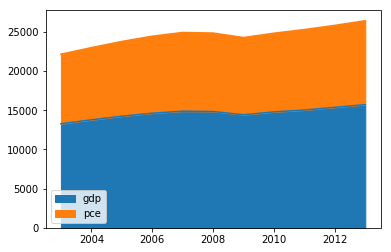

In [22]:
fig, axe = plt.subplots()        # create axis object axe
us.plot.area(ax=axe)            # ax= looks for axis object, axe is it

#### Heat Maps (Not sure to add)


### Graph Options

#### Basic Functionalities

A copule of basic elements that we **ALWAYS NEED**: (i) a title; (ii) well labeled x and y axis; (iii) sometimes legends. Note that the well labeled should mean a couple of things, what it is and what units they are in. Now the code below does this using the methods associated with our axes object `ax.` 


Here we will use the scatter plot as examples. The options we learned here applies to other graphs as well.

So let's figure out the following questions now:

* How to set axis labels?
* How to set titles?
* How to set the legends?


**Getting ready for the data...**

In [23]:
start = dt.datetime(2000,1,1) # Our start date

codes = ["GDPC1", "PCECC96", "GPDIC1", "GCEC1","EXPGSC1","IMPGSC1"] # Our codes

usdata = data.DataReader(codes, "fred", start)                 # Read  in the data

usdata.columns = ["gdp", "cons","invs", "gov", "exp", "imp"]   # Rename the columns in a simple way

usdata.head() # Look at it

,gdp,cons,invs,gov,exp,imp
DATE,,,,,,
2000-01-01,12924.179,8520.710,2257.109,2645.393,1337.203,1853.884
2000-04-01,13160.842,8603.007,2390.733,2671.254,1375.203,1911.437
2000-07-01,13178.419,8687.485,2367.274,2659.687,1408.783,1978.137
2000-10-01,13260.506,8762.205,2371.809,2675.695,1396.844,1977.750
2001-01-01,13222.690,8797.280,2264.202,2716.773,1376.171,1946.136


**A little more computations...**

In [24]:
var_list = ["gdp", "cons"]

for var in var_list:
    new_name = var + "_growth"
    usdata[new_name] = 100*4*usdata[var].pct_change()
    
usdata.head()

,gdp,cons,invs,gov,exp,imp,gdp_growth,cons_growth
DATE,,,,,,,,
2000-01-01,12924.179,8520.710,2257.109,2645.393,1337.203,1853.884,NaN,NaN
2000-04-01,13160.842,8603.007,2390.733,2671.254,1375.203,1911.437,7.324659,3.863387
2000-07-01,13178.419,8687.485,2367.274,2659.687,1408.783,1978.137,0.534221,3.927836
2000-10-01,13260.506,8762.205,2371.809,2675.695,1396.844,1977.750,2.491558,3.440351
2001-01-01,13222.690,8797.280,2264.202,2716.773,1376.171,1946.136,-1.140711,1.601195


##### Making it look more formative... Please pay attention to the additional codes


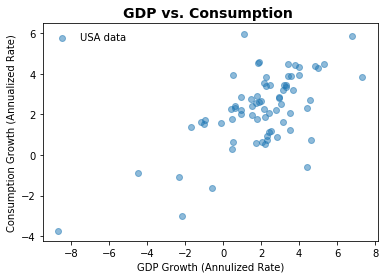

In [25]:
fig, ax = plt.subplots() # Same deal here...

ax.scatter(usdata["gdp_growth"], usdata["cons_growth"],     # x,y variables 
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...

##################################################################################

ax.set_title('GDP vs. Consumption ', loc='center', fontsize=14, fontweight = "bold") 
# We know this, but note the new option, it specifies the location....

ax.set_xlabel("GDP Growth (Annulized Rate)")
ax.set_ylabel("Consumption Growth (Annualized Rate)")

# Here the legend might not be important, but thinking about what if you 
# have two countries
ax.legend(["USA data"],frameon=False) # The legend, without a box...



Then we learn how to set xlim, ylim, and other handy graph setting details...

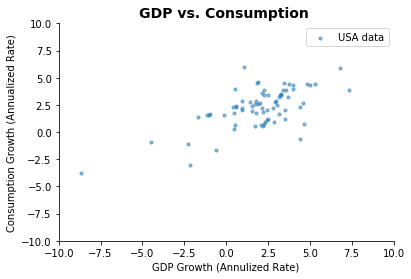

In [26]:
fig, ax = plt.subplots() # Same deal here...

ax.scatter(usdata["gdp_growth"], usdata["cons_growth"],     # x,y variables 
            alpha= 0.50,
           s=10) # Then this last command specifies how large the bubbles are...
                # Here we make it smaller

ax.set_title('GDP vs. Consumption ', loc='center', fontsize=14, fontweight = "bold") 
# We know this, but note the new option, it specifies the location....

ax.set_xlabel("GDP Growth (Annulized Rate)")
ax.set_ylabel("Consumption Growth (Annualized Rate)")

# Here the legend might not be important, but thinking about what if you 
# have two countries
ax.legend(["USA data"],frameon=True) # The legend, with a box...

##################################################################################
# This is the new stuff...

ax.set_ylim(-10,10) # This sets the y-limits
ax.set_xlim(-10,10) # This sets the x-limits

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

fig.savefig("us_gdp_consumption.png", bbox_inches = "tight", dip = 1200)


#### Advanced Functionalities

So far, we have learned the basic options to make your graph look nicer and closer to publication quality level. Here we will use several other stuffs as well.

* Annotation/Arrows
* Subplots 
* Styles

Let's start with Annotation!


**Annotation**

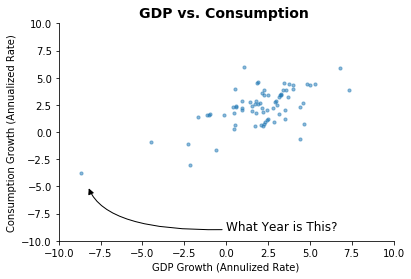

In [27]:
# Again, lets make this informative...
fig, ax = plt.subplots()
ax.scatter(usdata["gdp_growth"], usdata["cons_growth"],     
            alpha= 0.50,
           s=10) 
    
ax.set_title('GDP vs. Consumption ', loc='center', fontsize=14, fontweight = "bold") 

ax.set_xlabel("GDP Growth (Annulized Rate)")
ax.set_ylabel("Consumption Growth (Annualized Rate)")

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

ax.set_ylim(-10,10) # Make this a box...why, one can then by eye infer the slope...
ax.set_xlim(-10,10) # 

############################################################################
# This is something new I learned recently

ax.annotate(
    "What Year is This?", 
    xy=(-8.25, -5), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(0, -9), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=5,angleB=110",
        "color": "black"
    },
    fontsize=12,
)

############################################################################

plt.show()

**Subplots**

This is almost the first time specify something in `plt.subplots` function. The parameters are pretty self-explanatory and we have add comments in code as well if you are not familiar with this. 


Text(0.5,1,'Consumption')

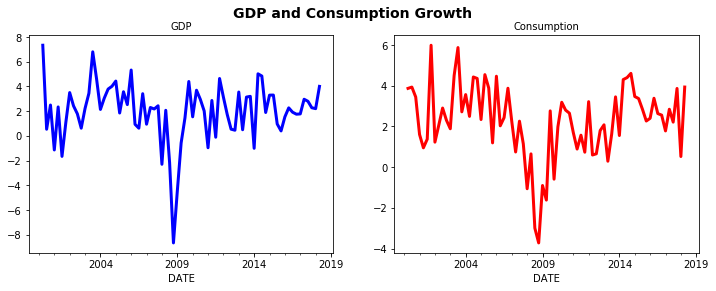

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4)) 

# Same deal as before, but here in the subplots we specified how many. This is given by
# the number of rows and columns for which the plots will be...
# the sharex command tells it to share the same x-axis, the figsize is awayt to controll
# how big/small it looksin the jupyter window

# IMPORTANT... now ax is multi-dimensional, so there are two of these, thus when we call 
# ax[0] this specifies use that axes or modify that one....

usdata.gdp_growth.plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify
                                                           #that the first axes is for GDP
usdata.cons_growth.plot(ax = ax[1], color = 'r', linewidth = 3.0)

# Again, note how I'm saying gdp growth is the first axes and consumption growth is the second axes...

#######################################################################################

# Now liets make it nice looking...add a Title for everything...

fig.suptitle("GDP and Consumption Growth", fontsize = 14, fontweight = "bold")

ax[0].set_title("GDP", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("Consumption", fontsize = 10)

#### Styles
Matplotlib has a lot of basic settings for graphs. If we find some we like, we can set them once and be done with it. Or we can use some of their preset combinations, which they call **styles**.



Text(0.5,1,'Consumption')

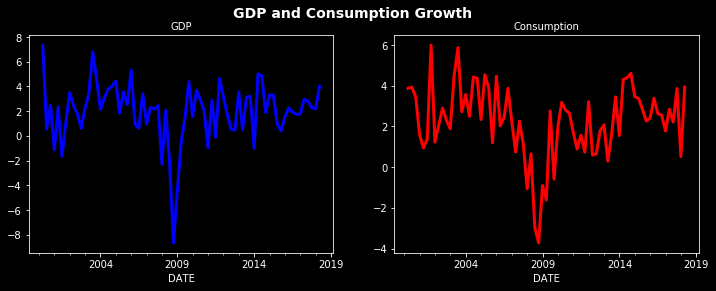

In [29]:
plt.style.use('dark_background')

fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4)) 

# Same deal as before, but here in the subplots we specified how many. This is given by
# the number of rows and columns for which the plots will be...
# the sharex command tells it to share the same x-axis, the figsize is awayt to controll
# how big/small it looksin the jupyter window

# IMPORTANT... now ax is multi-dimensional, so there are two of these, thus when we call 
# ax[0] this specifies use that axes or modify that one....

usdata.gdp_growth.plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify
                                                           #that the first axes is for GDP
usdata.cons_growth.plot(ax = ax[1], color = 'r', linewidth = 3.0)

# Again, note how I'm saying gdp growth is the first axes and consumption growth is the second axes...

#######################################################################################

# Now liets make it nice looking...add a Title for everything...

fig.suptitle("GDP and Consumption Growth", fontsize = 14, fontweight = "bold")

ax[0].set_title("GDP", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("Consumption", fontsize = 10)



Another style...

Text(0.5,1,'Consumption')

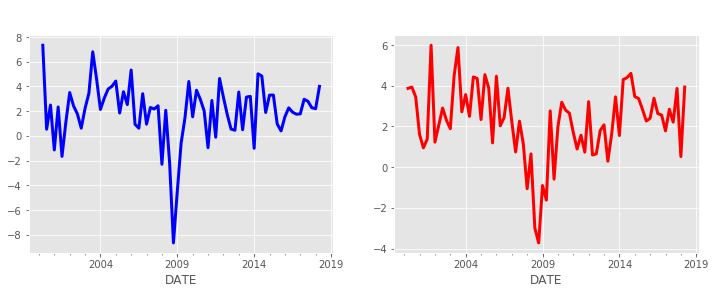

In [30]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4)) 

# Same deal as before, but here in the subplots we specified how many. This is given by
# the number of rows and columns for which the plots will be...
# the sharex command tells it to share the same x-axis, the figsize is awayt to controll
# how big/small it looksin the jupyter window

# IMPORTANT... now ax is multi-dimensional, so there are two of these, thus when we call 
# ax[0] this specifies use that axes or modify that one....

usdata.gdp_growth.plot(ax = ax[0], color = 'b', linewidth = 3.0) # Same idea, but specify
                                                           #that the first axes is for GDP
usdata.cons_growth.plot(ax = ax[1], color = 'r', linewidth = 3.0)

# Again, note how I'm saying gdp growth is the first axes and consumption growth is the second axes...

#######################################################################################

# Now liets make it nice looking...add a Title for everything...

fig.suptitle("GDP and Consumption Growth", fontsize = 14, fontweight = "bold")

ax[0].set_title("GDP", fontsize = 10) # This stuff sets the title for each of the subplots...
ax[1].set_title("Consumption", fontsize = 10)


You can find more styles in this [web](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

---
### Time to practice


**Exercise.** Try one of these styles: `bmh`, and `grayscale`.  Which ones do you like?  Why?


When we're done, we reset the style with these two lines in an code cell:



In [31]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

NameError: name 'mpl' is not defined

---
## Review Questions


Consider the data from Randal Olson's [blog post](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/):

In [ ]:
import pandas as pd
data = {'Food': ['French Fries', 'Potato Chips', 'Bacon', 'Pizza', 'Chili Dog'],
        'Calories per 100g':  [607, 542, 533, 296, 260]}
cals = pd.DataFrame(data)

The dataframe `cals` contains the calories in 100 grams of several different foods.




**Exercise.** We'll create and modify visualizations of this data:

* Set `'Food'` as the index of `cals`.
* Create a bar chart with `cals` using figure and axis objects.
* Add a title.
* Change the color of the bars.  What color do you prefer?
* Add the argument `alpha=0.5`.  What does it do?
* Change your chart to a horizontal bar chart.  Which do you prefer?
* *Challenging.*  Eliminate the legend.
* *Challenging.*  Skim the top of Olson's [blog post](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/). What do you see that you'd like to imitate?


---
## Summary